# Computing percent changes for each drug per month

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
# sns.set_style('white')
plt.style.use('fivethirtyeight')
from tqdm import tqdm


# Data

In [2]:
df = pd.read_csv('../../Data/Processed_data/merge_with_iqvia_2017_01_2020_09_monthly.csv')
df = df[['NDC', 'Product','Major Class', 'Acute/Chronic', 'Prod Form', 'WAC', 'Month', 'Year', 'TRx']]
df = df.dropna(subset=['WAC'])
df['date'] = df.Year.astype(str) + '_' + df.Month.astype(str).apply(lambda x: '0' + x if int(x)<10 else x)

df.head()

,NDC,Product,Major Class,Acute/Chronic,Prod Form,WAC,Month,Year,TRx,date
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,12,2017,240,2017_12
1,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,11,2017,258,2017_11
2,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,10,2017,175,2017_10
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,9,2017,190,2017_09
4,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,8,2017,176,2017_08


# Percent changes

In [3]:
# Pivoting to get prices per date
df_pivot = df.pivot_table(values=['WAC'], index=['NDC', 'Product', 'Major Class', 'Acute/Chronic', 'Prod Form'], columns='date')
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot.rename_axis(None, axis=1)
df_pivot = df_pivot.reset_index()
df_pivot.head()

,NDC,Product,Major Class,Acute/Chronic,Prod Form,2017_01,2017_02,2017_03,2017_04,2017_05,...,2019_10,2019_11,2019_12,2020_01,2020_02,2020_03,2020_04,2020_05,2020_06,2020_07
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,313.0,313.0,313.0,313.0,313.0,...,379.7,379.7,379.7,379.7,379.7,398.65,398.65,398.65,398.65,398.65
1,2143380,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,313.0,313.0,313.0,313.0,313.0,...,379.7,379.7,379.7,379.7,379.7,398.65,398.65,398.65,398.65,398.65
2,2143401,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,313.0,313.0,313.0,313.0,313.0,...,379.7,379.7,379.7,379.7,379.7,398.65,398.65,398.65,398.65,398.65
3,2143480,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,313.0,313.0,313.0,313.0,313.0,...,379.7,379.7,379.7,379.7,379.7,398.65,398.65,398.65,398.65,398.65
4,2143601,EMGALITY 10/2018 LLY,PAIN,ACUTE,INJECTABLES,NaN,NaN,NaN,NaN,NaN,...,575.0,575.0,575.0,575.0,575.0,603.60,603.60,603.60,603.60,603.60


In [56]:
# Computing percent changes between two consecutive months  
percent_changes = df_pivot[['NDC', 'Product', 'Major Class', 'Acute/Chronic', 'Prod Form']]
prices = df_pivot.drop(labels=percent_changes.columns, axis=1)

for i in range(len(prices.columns) - 1):
    pct_change = (prices.iloc[:, i+1] - prices.iloc[:, i]) / prices.iloc[:, i]
    percent_changes[f'pct_change_{prices.iloc[:, i+1].name}'] = pct_change
    
percent_changes.head()

<ipython-input-56-6d88ba2a1f29>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_changes[f'pct_change_{prices.iloc[:, i+1].name}'] = pct_change


,NDC,Product,Major Class,Acute/Chronic,Prod Form,pct_change_2017_02,pct_change_2017_03,pct_change_2017_04,pct_change_2017_05,pct_change_2017_06,...,pct_change_2019_10,pct_change_2019_11,pct_change_2019_12,pct_change_2020_01,pct_change_2020_02,pct_change_2020_03,pct_change_2020_04,pct_change_2020_05,pct_change_2020_06,pct_change_2020_07
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,0.0,0.0,0.0,0.0,0.079872,...,0.0,0.0,0.0,0.0,0.0,0.049908,0.0,0.0,0.0,0.0
1,2143380,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,0.0,0.0,0.0,0.0,0.079872,...,0.0,0.0,0.0,0.0,0.0,0.049908,0.0,0.0,0.0,0.0
2,2143401,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,0.0,0.0,0.0,0.0,0.079872,...,0.0,0.0,0.0,0.0,0.0,0.049908,0.0,0.0,0.0,0.0
3,2143480,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,0.0,0.0,0.0,0.0,0.079872,...,0.0,0.0,0.0,0.0,0.0,0.049908,0.0,0.0,0.0,0.0
4,2143601,EMGALITY 10/2018 LLY,PAIN,ACUTE,INJECTABLES,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.049739,0.0,0.0,0.0,0.0


In [57]:
# Correcting the different NDC for unique product
percent_changes = pd.merge(percent_changes.groupby(['Product']).mean().reset_index().drop('NDC', axis=1), 
                           percent_changes[['NDC', 'Product', 'Major Class', 'Acute/Chronic', 'Prod Form']].drop_duplicates(subset='Product'),
                           left_on='Product', right_on='Product', how='left')
percent_changes = percent_changes[['NDC', 'Product', 'Major Class', 'Acute/Chronic', 'Prod Form'] + list(percent_changes.columns[1: 43])]

<AxesSubplot:>

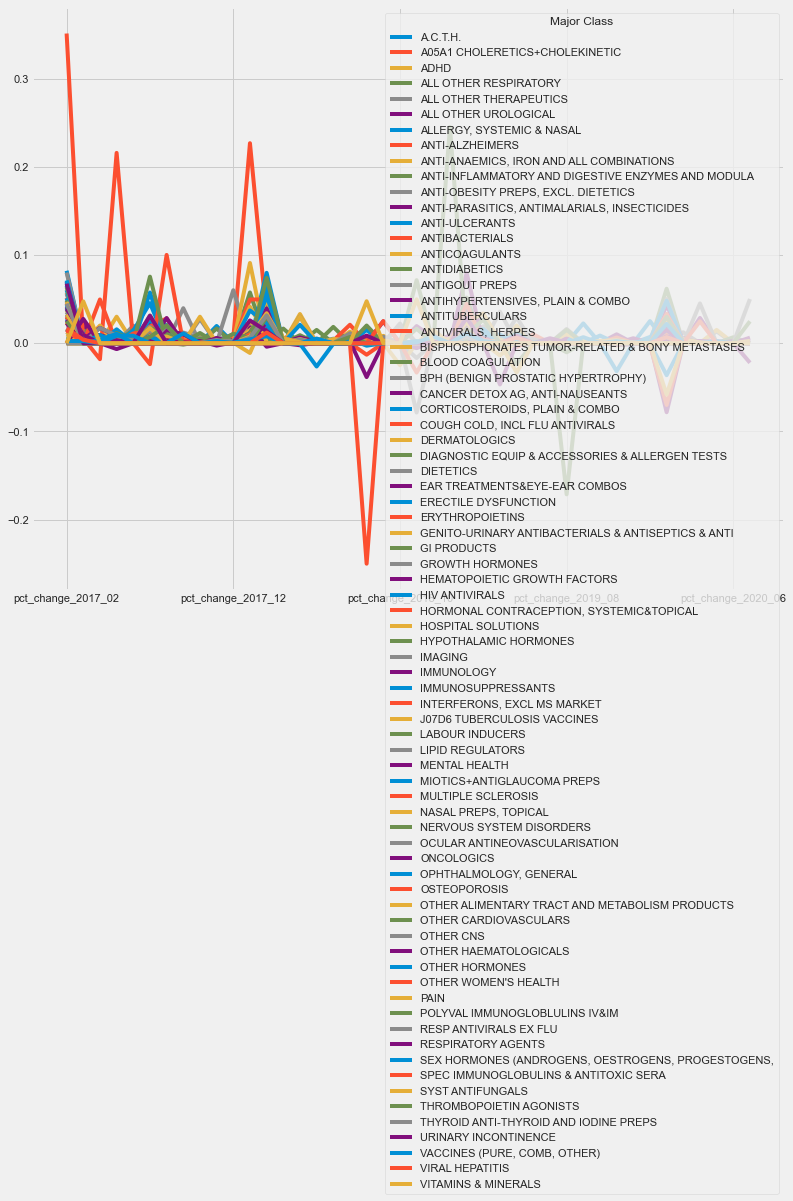

In [78]:
percent_changes.groupby('Major Class').mean().drop('NDC', axis=1).transpose().plot()

# Grouping by Class & Sum

In [ ]:
# Creating 